# **Tarea 2**
## Machine Learning
### Kathryn Barraza - Estudiante de Ing. Civil Matemática UV


---



El siguiente trabajo está basado en 
- La implementación vista en clases, realizada por el Profesor Alejandro Pereira, para los primeros modelos: regresión logística y svm.
- Códigos que fueron extraídos de internet para los últimos modelos: Naïve Bayes, LDA y QDA.

# **Objetivos**
### Comparar regression logística, SVM, Naive Bayes, LDA y QDA
### Usando las métricas de desempeño correspondientes.
### Hacer un código con comentarios y análisis.

In [1]:
#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
import sklearn.metrics as sk_metrics 
# log_loss, roc_auc_score, recall_score, precision_score, 
# average_precision_score, f1_score, classification_report, 
# accuracy_score, roc_curve, precision_recall_curve, confusion_matrix
from scipy.special import expit

from sklearn.preprocessing import StandardScaler

In [2]:
#Importamos los datos
from google.colab import drive
drive.mount('/content/drive')
url='/content/drive/MyDrive/data.csv'
df= pd.read_csv(url)

Mounted at /content/drive


In [3]:
#Mostramos los primeros datos de todo nuestro conjunto 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
#Aquí arreglamos ciertas cosas con respecto a la data: renombramos, borramos lo que tiene datos perdidos y vemos al final con cuantos datos nos quedamos.
df.rename(columns = {'num       ': 'attack'}, inplace = True)
df.replace("?", np.nan, inplace = True)
df.drop(columns = ['slope', 'ca', 'thal'], inplace = True)
df.dropna(inplace= True)
df.shape 

(261, 11)

### Variables que vamos a usar

    age: age in years
    sex: sex (1 = male; 0 = female)
    cp: chest pain type
    – 1: typical angina
    – 2: atypical angina
    – 3: non-anginal pain
    – 4: asymptomatic
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    chol: serum cholesterol in mg/dl
    fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results
    – 0: normal
    – 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    – 2: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    thalach: maximum heart rate achieved
    exang: exercise-induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest

## Test - Train split

Hacemos la separación de nuestra muestra en datos de entrenamiento y datos de evaluación. Esta separación se hará para los cinco modelos con el mismo tamaño de test 0.20 y semilla 123. Esto con el fin de que nuestras comparaciones finales sean más consecuentes.

In [5]:
random_seed = 123
df_train, df_test = train_test_split(df, test_size=0.20, random_state=random_seed, stratify=df['attack'])


print(df_train.shape) #tamaño de nuestros datos de entrenamiento
print(df_test.shape) #tamaño de nuestros datos de evaluación

print("\nPercentages of heart attacks in Train data:\n", df_train['attack'].value_counts(normalize=True))
print("\nPercentages of heart attacks in Test data:\n", df_test['attack'].value_counts(normalize=True))

(208, 11)
(53, 11)

Percentages of heart attacks in Train data:
 0    0.625
1    0.375
Name: attack, dtype: float64

Percentages of heart attacks in Test data:
 0    0.622642
1    0.377358
Name: attack, dtype: float64


In [6]:
#Separamos a las variables en dos grupos, numericas y categoricas
#Estandarización de variables numéricas para trabajar con el modelo de Regresión logística
## pues al intentar hacerlo sin reescalamiento había un aviso de problemas de convergencia, por lo que mejor estandarizamos en este caso

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_cols = list(set(df.columns) - set(numeric_cols) - {'attack'})
cat_cols.sort()

print("Numerical var:", numeric_cols)
print("\nCategorical var:", cat_cols)

scaler = StandardScaler()
scaler.fit(df_train[numeric_cols])

def get_features_and_target_arrays(df, numeric_cols, cat_cols, scaler):
    X_numeric_scaled = scaler.transform(df[numeric_cols])
    X_categorical = df[cat_cols].to_numpy()
    X = np.hstack((X_categorical, X_numeric_scaled))
    y = df['attack']
    return X, y

X, y = get_features_and_target_arrays(df_train, numeric_cols, cat_cols, scaler)

Numerical var: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Categorical var: ['cp', 'exang', 'fbs', 'restecg', 'sex']


# **Regresión Logística**
La regresión logística es un modelo de regresión supervisado que modela la probabilidad. Es una técnica de análisis de datos para encontrar las relaciones entre dos factores de datos. Luego, utiliza esta relación para predecir el valor de uno de esos factores basándose en el otro. 

---



In [7]:
log = LogisticRegression()

log.fit(X, y)

LogisticRegression()

In [ ]:
#Evaluamos el modelo

In [8]:
X_test_log, y_test_log = get_features_and_target_arrays(df_test, numeric_cols, cat_cols, scaler)

In [9]:
y_score_log = log.decision_function(X_test_log)

Text(0.5, 1.0, 'Roc de Regresión Logística')

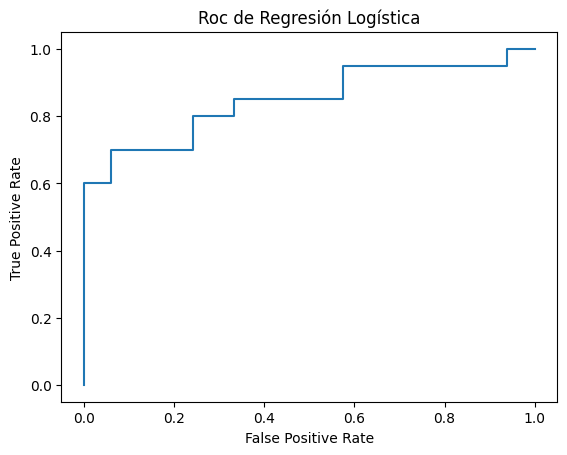

In [74]:
fpr_log, tpr_log, _ = sk_metrics.roc_curve(y_test_log, y_score_log, pos_label= log.classes_[1])
roc_display_log = sk_metrics.RocCurveDisplay(fpr= fpr_log, tpr= tpr_log).plot()
plt.title('Roc de Regresión Logística')

Text(0.5, 1.0, 'Roc de Regresión Logística + random guessing')

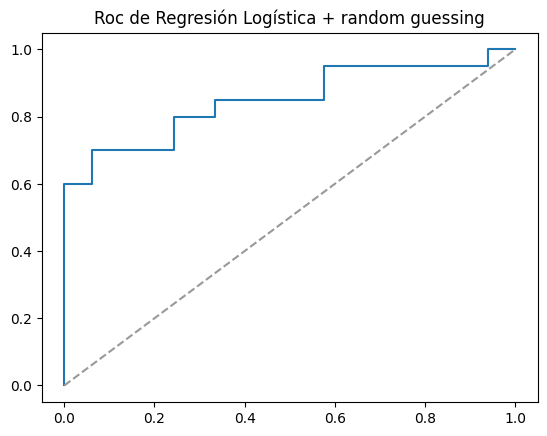

In [72]:
roc_auc_log = sk_metrics.auc(fpr_log,tpr_log)
plt.plot(fpr_log, tpr_log, label="ROC fold (area=%0.2f)"%(roc_auc_log))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Roc de Regresión Logística + random guessing')

Vemos que el modelo de regresión logística ajusta mejor que nuestra línea punteada gris, que representa el "random guessing", que sería equivalente a un simple experimento como lanzar una moneda, con probabilidad 1/2 de salir cara y 1/2 de salir sello. 

Nos interesa esta comparación, pues en el caso de que los dos modelos ajusten similar, preferentemente eligiremos el más simple. En este caso vemos que la curva roc de nuestro modelo está más cerca del 1 que el "random guessing", por lo que nos inclinariamos más por él. 

In [12]:
roc_auc_log

0.8484848484848484

Aquí vemos el valor del AUC, que es de un porcentaje de 84%.

Sabemos que mientras más alto valor tiene el AUC de un modelo, este es mejor; donde el máximo es 1. Esto siempre que nos estemos enfocando en esta medida para comparar modelos, ya que sabemos que hay muchas más, para poder decidir realmente qué modelo es más apropiado para un problema).

Ahora en nuestro caso el AUC del modelo de regresión logística nos está dando un buen valor para considerar en nuestras conclusiones finales.

# **SVM**
El modelo SVM se puede definir como un conjunto de algoritmos de aprendizaje supervisado. Por ejemplo, dado un conjunto de muestras de entrenamiento, podemos etiquetar las clases y entrenar con ellas un modelo SVM, que nos servirá para predecir la clase de una nueva muestra.

---



In [13]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

In [15]:
y = df["attack"]
X = df.drop('attack',axis=1)
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.20, random_state = 123, stratify=df['attack'])

In [73]:
svc =  svm.SVC(kernel='linear', C=1)
svc.fit(X_train_svm, y_train_svm)

svc_predicted = svc.predict(X_test_svm)

In [17]:
y_score_svm = svc.decision_function(X_test_svm.to_numpy())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Roc de SVM')

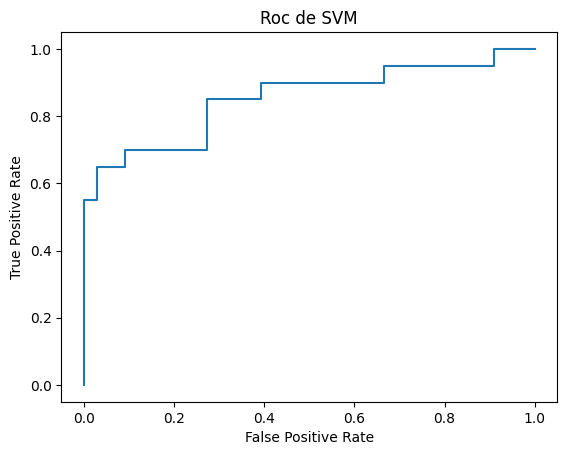

In [76]:
fpr_svm, tpr_svm, _ = sk_metrics.roc_curve(y_test_svm, y_score_svm)
roc_display_svm = sk_metrics.RocCurveDisplay(fpr= fpr_svm, tpr= tpr_svm).plot()
plt.title('Roc de SVM')

Tenemos nuestra curva Roc que se acerca al 1 y queremos comparar con nuestro experimento aleatorio al igual que hicimos antes con la regresión logística.

Text(0.5, 1.0, 'Roc de SVM + random guessing')

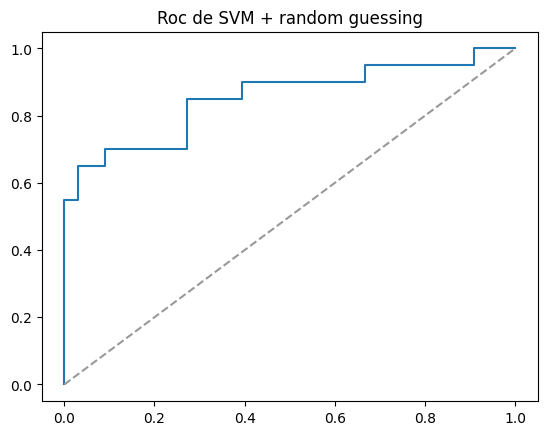

In [77]:
roc_auc_svm=sk_metrics.auc(fpr_svm,tpr_svm)
plt.plot(fpr_svm, tpr_svm, label="ROC fold (area=%0.2f)"%(roc_auc_svm))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Roc de SVM + random guessing')

Notamos que la curva Roc supera el "random guessing" y además como se acerca al 1, podemos preferir el modelo SVM sobre el experimento aleatorio. Más adelante haremos la comparación entre modelos.

In [20]:
roc_auc_svm

0.8530303030303031

Vemos que el AUC del SVM nos está dando un porcentaje de 85% aproximadamente, lo cual es bastante bueno.

# **Naive Bayes**
Los modelos de Naive Bayes se basan en una técnica de clasificación estadística llamada “teorema de Bayes”. Son llamados algoritmos “Naive”, o “Inocentes” en español, pues en ellos se asume que las variables predictoras son independientes entre sí, por lo tanto proporcionan una manera fácil de construir modelos con un comportamiento muy bueno debido a su simplicidad.

---



In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [23]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(
    X, y, test_size=0.20, random_state=123
)

In [24]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_nb, y_train_nb);

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

In [27]:
y_gnb_score = gnb.predict_proba(X_test_nb)

Text(0.5, 1.0, 'Roc de Naive Bayes')

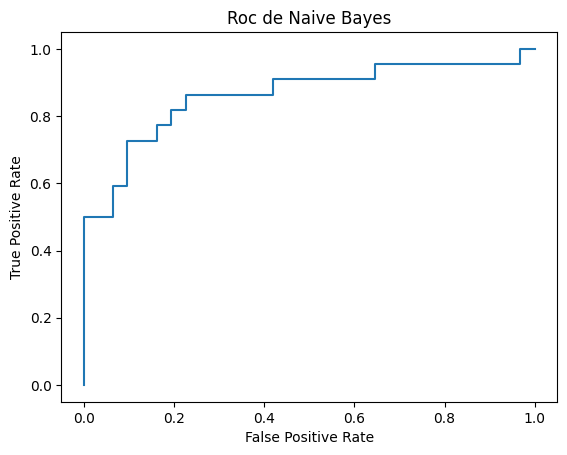

In [79]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test_nb, y_gnb_score[:, 1])
roc_display_gnb = sk_metrics.RocCurveDisplay(fpr= fpr_gnb, tpr= tpr_gnb).plot()
plt.title('Roc de Naive Bayes')

Podemos ver que también esta curva Roc se acerca al 1, por lo que veremos como se ve con respecto al experimento aleatorio, que podemos desde ya deducir que Naive Bayes será mejor.

Text(0.5, 1.0, 'Roc de Naive Bayes + random guessing')

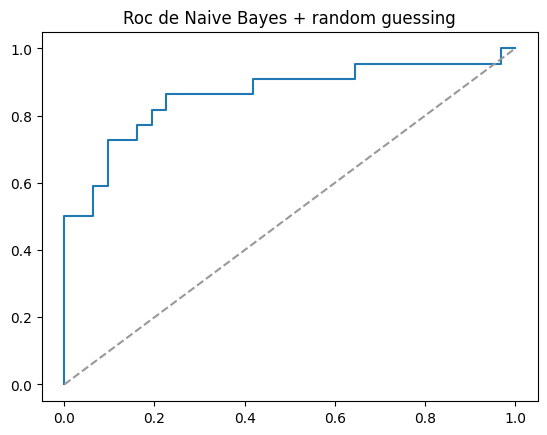

In [80]:
roc_auc_gnb=sk_metrics.auc(fpr_gnb,tpr_gnb)
plt.plot(fpr_gnb, tpr_gnb, label="ROC fold (area=%0.2f)"%(roc_auc_gnb))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Roc de Naive Bayes + random guessing')

Claramente notamos que Naive Bayes ajusta mejor que "random guessing", por lo que lo preferimos y más adelante veremos quien de los cinco modelos es probablemente mejor.

In [30]:
roc_auc_gnb

0.8621700879765396

Aquí también vemos que el AUC está bastante bueno, ya que es un porcentaje del 86% por lo que se acerca al 1.

# **LDA**
El análisis discriminante linear (LDA) es un algoritmo de aprendizaje supervisado que se utiliza para tareas de clasificación en Machine Learning. Es una técnica utilizada para encontrar una combinación lineal de características que mejor separe las clases en un conjunto de datos.

---



In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [32]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_lda, X_test_lda, y_train_lda, y_test_lda = train_test_split(
    X, y, test_size=0.20, random_state=123
)

In [33]:
lda = LDA()

lda.fit(X_train_lda, y_train_lda);

In [34]:
y_lda_score = lda.predict_proba(X_test_lda)

Text(0.5, 1.0, 'Roc de LDA')

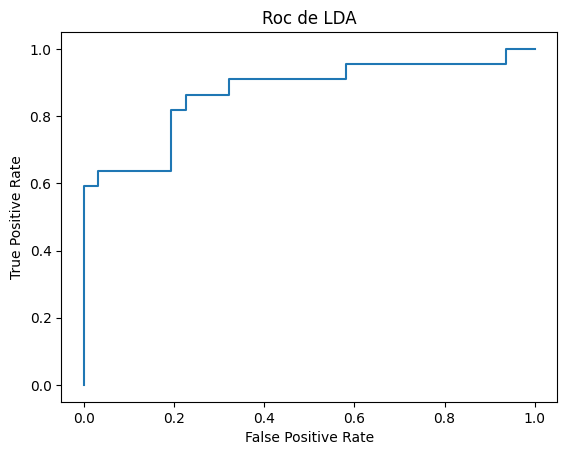

In [83]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test_lda, y_lda_score[:, 1])
roc_display_lda = sk_metrics.RocCurveDisplay(fpr= fpr_lda, tpr= tpr_lda).plot()
plt.title('Roc de LDA')

De manera similar a las otras curvas Roc que hemos visto, esta también se ve buena, ya que, también está cercana al 1. 

Text(0.5, 1.0, 'Roc de LDA + random guessing')

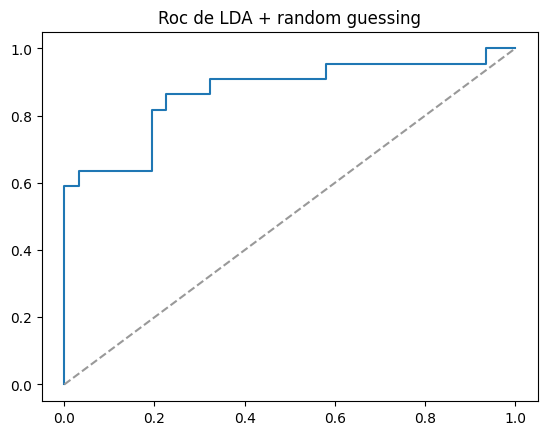

In [84]:
roc_auc_lda =sk_metrics.auc(fpr_lda,tpr_lda)
plt.plot(fpr_lda, tpr_lda, label="ROC fold (area=%0.2f)"%(roc_auc_lda))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Roc de LDA + random guessing')

Luego comparando con el experimento aleatorio, es claro que nos conviene quedarnos con el modelo LDA. 

In [37]:
roc_auc_lda

0.8695014662756598

También vemos el valor del AUC del modelo LDA y concluimos que es muy bueno, se acerca casi a un pocentaje de 87%, que sería el más alto hasta ahora con respecto a los modelos ya vistos. Continuamos ahora con el QDA para finalizar y elegir un modelo.

# **QDA**
Al igual que LDA, el clasificador QDA asume que las observaciones de cada clase de Y se extraen de una distribución gaussiana. Sin embargo, a diferencia de LDA, QDA asume que cada clase tiene su propia matriz de covarianza.

---


In [38]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [39]:
y = df["attack"]
X = df.drop('attack',axis=1)

X_train_qda, X_test_qda, y_train_qda, y_test_qda = train_test_split(
    X, y, test_size=0.20, random_state=123
)

In [40]:
qda = QDA()
qda.fit(X_train_qda, y_train_qda)

QuadraticDiscriminantAnalysis()

In [41]:
y_score_qda = qda.predict_proba(X_test_qda)

Text(0.5, 1.0, 'Roc de QDA')

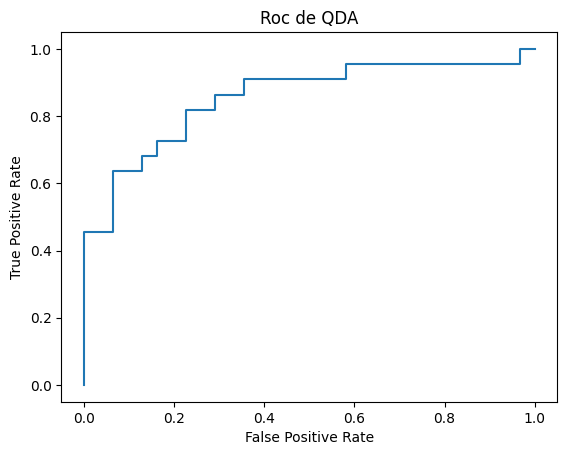

In [85]:
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test_qda, y_score_qda[:, 1])
roc_display_qda = sk_metrics.RocCurveDisplay(fpr= fpr_qda, tpr= tpr_qda).plot()
plt.title('Roc de QDA')

Se ve una buena buena curva que se acerca al 1. 
Ahora veremos la comparación con el experimento aleatorio.

Text(0.5, 1.0, 'Roc de QDA + random guessing')

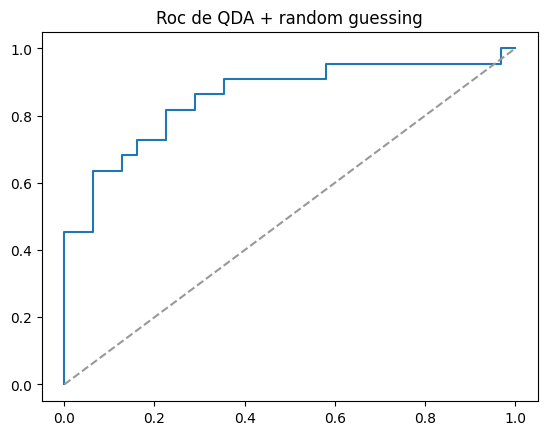

In [86]:
roc_auc_qda = sk_metrics.auc(fpr_qda,tpr_qda)
plt.plot(fpr_qda, tpr_qda, label="ROC fold (area=%0.2f)"%(roc_auc_qda))
plt.plot([0,1],[0,1],linestyle="--",color=(0.6,0.6,0.6),label="random guessing")
plt.title('Roc de QDA + random guessing')

Notamos que ajusta mucho mejor que el experimento aleatorio, por lo que podemos decir que en realidad los cinco modelos implementados son mejores que el "random guessing", el cual a pesar de que sea más simple no estima tan bien como los modelos.

In [44]:
roc_auc_qda

0.8548387096774194

Aquí también vemos un buen AUC.

Observamos que tenemos buenos modelos, así que en lo que sigue veremos métricas para hacer la comparación entre los cinco y ver cual podríamos elegir como el mejor o más aceptable que los demás.

# **Métricas de desempeño**
A continuación veremos las métricas de desempeño de los cinco modelos.

Además del AUC, que ya ha sido mostrado en cada implementación de los modelos, veremos también el Accuracy y el F1-score: 



*   AUC: es una métrica utilizada para evaluar el rendimiento de los modelos de aprendizaje automático de clasificación.


*   Accuracy (exactitud): es la proporción de predicciones correctas.


*   $F_1$ - score: es la media armónica de precisión y sensibilidad del test.


---



In [66]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report,
)

y_pred_log = log.fit(X, y).predict(X_test_log)
y_pred_svm = svc.fit(X_train_svm, y_train_svm).predict(X_test_svm)
y_pred_nb = gnb.fit(X_train_nb, y_train_nb).predict(X_test_nb)
y_pred_lda = lda.fit(X_train_lda, y_train_lda).predict(X_test_lda)
y_pred_qda = qda.fit(X_train_qda, y_train_qda).predict(X_test_qda)

accuray_log = accuracy_score(y_pred_log, y_test_log)
f1_log = f1_score(y_pred_log, y_test_log, average="weighted")
accuray_svm = accuracy_score(y_pred_svm, y_test_svm)
f1_svm = f1_score(y_pred_svm, y_test_svm, average="weighted")
accuray_nb = accuracy_score(y_pred_nb, y_test_nb)
f1_nb = f1_score(y_pred_nb, y_test_nb, average="weighted")
accuray_lda = accuracy_score(y_pred_lda, y_test_lda)
f1_lda = f1_score(y_pred_lda, y_test_lda, average="weighted")
accuray_qda = accuracy_score(y_pred_qda, y_test_qda)
f1_qda = f1_score(y_pred_qda, y_test_qda, average="weighted")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [67]:
# Tabla de comparaciones 

d = [ ["LG", roc_auc_log, accuray_log, f1_log],
     ["SVM", roc_auc_svm, accuray_svm, f1_svm],
     ["GNB", roc_auc_gnb, accuray_nb, f1_nb],
     ["LDA", roc_auc_lda, accuray_lda, f1_lda],
     ["QDA", roc_auc_qda, accuray_qda, f1_qda]]
     
print ("{:<8} {:<10}   {:<20}  {:<30}".format('Modelo','AUC','        Accuracy','        F1'))

for v in d:
    Modelo, AUC, Accuracy, F1= v
    print ("{:<8} {:<10}   {:<20}  {:<30}".format( Modelo, AUC, Accuracy, F1))

Modelo   AUC                  Accuracy              F1                    
LG       0.8484848484848484   0.6981132075471698    0.6941293642450064            
SVM      0.8530303030303031   0.7924528301886793    0.7935648318639026            
GNB      0.8621700879765396   0.8113207547169812    0.8150371640937679            
LDA      0.8695014662756598   0.8301886792452831    0.837638294570206             
QDA      0.8548387096774194   0.7924528301886793    0.7952564692555489            


# Conclusión

De la información recopilada a lo largo de este trabajo podemos notar que el modelo LDA es el que mejor se ve en término de las medidas AUC, Accuracy y F1.

 En los tres casos el LDA toma los valores más grandes entre los cinco modelos trabajados y además son muy cercanos al 1. Por lo tanto podríamos decir que el mejor con respecto a las mediciones es el modelo LDA, sin embargo no podemos descartar los otros cuatro rotundamente, ya que, los valores que toman en las mediciones de la tabla vista anteriormente también son cercanos al 1. 
 
 Para poder definitivamente escoger uno, tendríamos que comparar también el tamaño de los datos que estamos tomando como training; probar con varios valores y ahí tendríamos una perspectiva más amplia y podríamos tomar una mejor decisión. Pero para esta oportunidad diremos que el mejor (sin menospreciar la exactitud de los otros) sería el modelo Linear Discrimination Analysis. 